In [6]:
#subimos el dataset
from google.colab import files

uploaded = files.upload()  # Esto te permitirá subir tu CSV desde tu computadora

Saving heart_disease_3000v1.csv to heart_disease_3000v1.csv


In [15]:
#cargamos un dataframe de pandas
import pandas as pd

# Cargar CSV usando ; como separador
data = pd.read_csv("heart_disease_3000v1.csv", sep=';')

# Revisar las columnas
print(data.columns)
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'bmi']
target_col = 'heart_disease'



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'smoking', 'diabetes', 'bmi',
       'heart_disease'],
      dtype='object')


In [16]:
#verificar valores faltantes
# Verificar si hay valores nulos en cada columna
print(data.isnull().sum())

# Información general del dataset
data.info()


age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
smoking          0
diabetes         0
bmi              0
heart_disease    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            3069 non-null   int64
 1   sex            3069 non-null   int64
 2   cp             3069 non-null   int64
 3   trestbps       3069 non-null   int64
 4   chol           3069 non-null   int64
 5   fbs            3069 non-null   int64
 6   restecg        3069 non-null   int64
 7   thalach        3069 non-null   int64
 8   exang          3069 non-null   int64
 9   oldpeak        3069 non-null   int64
 10  slope          3069 non-null   int64
 11  ca    

In [17]:
#Normalización/Estandarización de variables numéricas
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'bmi']
target_col = 'heart_disease'


In [18]:
#estandariza estas columnas usando StandardScaler:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Revisar cambios
data[numerical_cols].head()



,age,trestbps,chol,thalach,oldpeak,bmi
0,1.057903,-1.085739,1.285710,-1.087926,-1.048005,-0.562711
1,0.328257,-1.149036,-1.636048,-0.372753,1.226587,1.085518
2,-0.693246,0.813165,1.095013,-0.511173,0.283463,0.330080
3,1.349761,-1.750356,1.197172,0.388561,0.838242,-1.689000
4,-1.203998,-0.832552,-1.472593,-0.165122,1.503976,-1.482971


In [19]:
#variable objetivo
target_col = 'heart_disease'
#revisamos distribucion de clases
# Contar valores de la variable objetivo
print(data[target_col].value_counts())



heart_disease
0    1878
1    1191
Name: count, dtype: int64


In [20]:
#Separar características y variable objetivo
from sklearn.model_selection import train_test_split

# Separar features (X) y target (y)
X = data.drop(target_col, axis=1)
y = data[target_col]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
#aplicamos SMOTE
# Instalar imbalanced-learn si no está instalado
!pip install imbalanced-learn --quiet

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Revisar el balance después de SMOTE
print(y_train_res.value_counts())


heart_disease
1    1502
0    1502
Name: count, dtype: int64


In [22]:
#Verificación final
print("Antes de SMOTE:")
print(y_train.value_counts())

print("\nDespués de SMOTE:")
print(y_train_res.value_counts())


Antes de SMOTE:
heart_disease
0    1502
1     953
Name: count, dtype: int64

Después de SMOTE:
heart_disease
1    1502
0    1502
Name: count, dtype: int64


In [23]:
#Entrenamiento de Clasificadores
#importamos librerias
# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report



In [24]:
#Regresión Logística
# Crear el modelo
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo
log_model.fit(X_train_res, y_train_res)

# Predecir
y_pred_log = log_model.predict(X_test)

# Evaluar
print("Regresión Logística")
print(classification_report(y_test, y_pred_log))


Regresión Logística
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       376
           1       0.51      0.58      0.54       238

    accuracy                           0.62       614
   macro avg       0.61      0.61      0.61       614
weighted avg       0.63      0.62      0.62       614



In [25]:
#arbol de decision
# Crear el modelo
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar
tree_model.fit(X_train_res, y_train_res)

# Predecir
y_pred_tree = tree_model.predict(X_test)

# Evaluar
print("Árbol de Decisión")
print(classification_report(y_test, y_pred_tree))


Árbol de Decisión
              precision    recall  f1-score   support

           0       0.64      0.59      0.62       376
           1       0.43      0.48      0.45       238

    accuracy                           0.55       614
   macro avg       0.54      0.54      0.54       614
weighted avg       0.56      0.55      0.55       614



In [26]:
#Random Forest
# Crear el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar
rf_model.fit(X_train_res, y_train_res)

# Predecir
y_pred_rf = rf_model.predict(X_test)

# Evaluar
print("Random Forest")
print(classification_report(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       376
           1       0.49      0.48      0.49       238

    accuracy                           0.61       614
   macro avg       0.59      0.58      0.58       614
weighted avg       0.61      0.61      0.61       614



In [27]:
#Support Vector Machine (SVM)
# Crear el modelo
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Entrenar
svm_model.fit(X_train_res, y_train_res)

# Predecir
y_pred_svm = svm_model.predict(X_test)

# Evaluar
print("SVM")
print(classification_report(y_test, y_pred_svm))


SVM
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       376
           1       0.49      0.59      0.53       238

    accuracy                           0.60       614
   macro avg       0.59      0.60      0.59       614
weighted avg       0.62      0.60      0.60       614



In [28]:
#Métricas adicionales opcionales (ROC-AUC)
# Para ROC-AUC necesitamos probabilidades
y_prob_log = log_model.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:,1]
y_prob_svm = svm_model.predict_proba(X_test)[:,1]

print("ROC-AUC Logística:", roc_auc_score(y_test, y_prob_log))
print("ROC-AUC Random Forest:", roc_auc_score(y_test, y_prob_rf))
print("ROC-AUC SVM:", roc_auc_score(y_test, y_prob_svm))


ROC-AUC Logística: 0.6466118362238512
ROC-AUC Random Forest: 0.6287099946361524
ROC-AUC SVM: 0.6350125156445556


In [29]:
#5.	Primera Ejecución del Modelo
#Confiabilidad del Modelo
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Ejemplo: Regresión Logística
print("Regresión Logística - Métricas Iniciales")
print(classification_report(y_test, y_pred_log))

# Métricas resumidas
accuracy_log = accuracy_score(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, y_prob_log)

print(f"Accuracy: {accuracy_log:.4f}")
print(f"ROC-AUC: {roc_auc_log:.4f}")


Regresión Logística - Métricas Iniciales
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       376
           1       0.51      0.58      0.54       238

    accuracy                           0.62       614
   macro avg       0.61      0.61      0.61       614
weighted avg       0.63      0.62      0.62       614

Accuracy: 0.6189
ROC-AUC: 0.6466


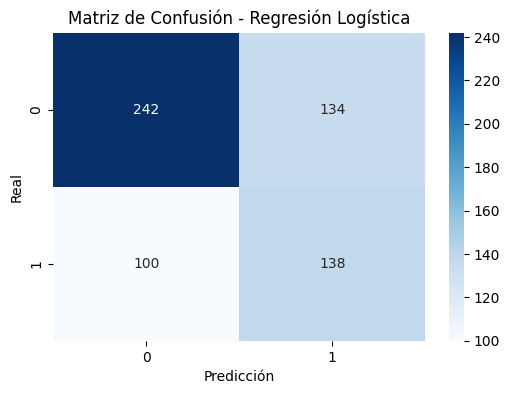

In [30]:
#5.2 Matriz de Confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión para Regresión Logística
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [31]:
#6.1 Primera ejecución: 80% entrenamiento / 20% prueba
from sklearn.model_selection import train_test_split

# División 80/20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
#6.2 Segunda ejecución: 50% entrenamiento / 50% prueba
# División 50/50
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)


In [33]:
#6.3 Evaluación con múltiples asignaciones (repeticiones aleatorias)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Parámetros
n_repeats = 100
accuracy_scores = []

for i in range(n_repeats):
    # Dividir datos aleatoriamente
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
        X, y, test_size=0.2, stratify=y
    )

    # Entrenar modelo (ejemplo: regresión logística)
    model = LogisticRegression(max_iter=1000, random_state=i)
    model.fit(X_train_r, y_train_r)

    # Predecir y almacenar accuracy
    y_pred_r = model.predict(X_test_r)
    acc = accuracy_score(y_test_r, y_pred_r)
    accuracy_scores.append(acc)

# Mediana de accuracy
median_accuracy = np.median(accuracy_scores)
print(f"Mediana de Accuracy tras {n_repeats} asignaciones aleatorias: {median_accuracy:.4f}")


Mediana de Accuracy tras 100 asignaciones aleatorias: 0.6441


In [34]:
# Librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

# Cargar CSV con separador ;
data = pd.read_csv("heart_disease_3000v1.csv", sep=';')

# Columnas numéricas y target
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'bmi']
target_col = 'heart_disease'

# Escalado
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Separar X e y
X = data.drop(target_col, axis=1)
y = data[target_col]

# Aplicar SMOTE solo en entrenamiento
smote = SMOTE(random_state=42)

# Definición de modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

# Función para evaluar un modelo con división específica
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Balanceo con SMOTE
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    # Entrenamiento
    model.fit(X_train_res, y_train_res)
    # Predicción
    y_pred = model.predict(X_test)
    # Métricas
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, f1

# --- Primera ejecución: 80/20 ---
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Primera Ejecución: 80% entrenamiento / 20% prueba")
for name, model in models.items():
    acc, f1 = evaluate_model(model, X_train_80, X_test_20, y_train_80, y_test_20)
    print(f"{name} -> Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

# --- Segunda ejecución: 50/50 ---
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

print("\nSegunda Ejecución: 50% entrenamiento / 50% prueba")
for name, model in models.items():
    acc, f1 = evaluate_model(model, X_train_50, X_test_50, y_train_50, y_test_50)
    print(f"{name} -> Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

# --- Evaluación con 100 asignaciones aleatorias ---
n_repeats = 100
median_results = {}

print("\nEvaluación con 100 asignaciones aleatorias:")
for name, model in models.items():
    acc_list = []
    f1_list = []
    for i in range(n_repeats):
        X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
            X, y, test_size=0.2, stratify=y
        )
        acc, f1 = evaluate_model(model, X_train_r, X_test_r, y_train_r, y_test_r)
        acc_list.append(acc)
        f1_list.append(f1)
    median_results[name] = {
        "median_accuracy": np.median(acc_list),
        "median_f1": np.median(f1_list)
    }
    print(f"{name} -> Mediana Accuracy: {median_results[name]['median_accuracy']:.4f}, Mediana F1-score: {median_results[name]['median_f1']:.4f}")


Primera Ejecución: 80% entrenamiento / 20% prueba
Logistic Regression -> Accuracy: 0.6189, F1-score: 0.5412
Decision Tree -> Accuracy: 0.5505, F1-score: 0.4545
Random Forest -> Accuracy: 0.6075, F1-score: 0.4883
SVM -> Accuracy: 0.5993, F1-score: 0.5323

Segunda Ejecución: 50% entrenamiento / 50% prueba
Logistic Regression -> Accuracy: 0.6176, F1-score: 0.5425
Decision Tree -> Accuracy: 0.5557, F1-score: 0.4730
Random Forest -> Accuracy: 0.6059, F1-score: 0.4735
SVM -> Accuracy: 0.6078, F1-score: 0.5432

Evaluación con 100 asignaciones aleatorias:
Logistic Regression -> Mediana Accuracy: 0.6132, Mediana F1-score: 0.5413
Decision Tree -> Mediana Accuracy: 0.5521, Mediana F1-score: 0.4565
Random Forest -> Mediana Accuracy: 0.6205, Mediana F1-score: 0.5032
SVM -> Mediana Accuracy: 0.6107, Mediana F1-score: 0.5558


In [35]:
#7.2 Optimización de Componentes
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Dividir en características (X) y objetivo (y)
X = data.drop(target_col, axis=1)
y = data[target_col]

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir números de componentes a probar
components_to_try = [12, 10, 9, 5, 3]
results = {}

for n_components in components_to_try:
    print(f"\nEvaluando PCA con {n_components} componentes:")

    # Aplicar PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # División 80/20 para entrenamiento y prueba
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
        X_pca, y, test_size=0.2, random_state=42, stratify=y
    )

    # Entrenamiento del modelo (Random Forest)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_pca, y_train_pca)

    # Predicción y evaluación
    y_pred_pca = rf_model.predict(X_test_pca)
    report = classification_report(y_test_pca, y_pred_pca)

    # Guardar resultados
    results[n_components] = report
    print(report)




Evaluando PCA con 12 componentes:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72       376
           1       0.46      0.22      0.30       238

    accuracy                           0.60       614
   macro avg       0.55      0.53      0.51       614
weighted avg       0.57      0.60      0.56       614


Evaluando PCA con 10 componentes:
              precision    recall  f1-score   support

           0       0.65      0.83      0.72       376
           1       0.51      0.28      0.36       238

    accuracy                           0.62       614
   macro avg       0.58      0.55      0.54       614
weighted avg       0.59      0.62      0.58       614


Evaluando PCA con 9 componentes:
              precision    recall  f1-score   support

           0       0.64      0.83      0.72       376
           1       0.49      0.26      0.34       238

    accuracy                           0.61       614
   macro avg       0.57 

In [36]:
# 8 Análisis No Supervisado
#Primero, separamos los datos de la variable objetivo y estandarizamos las características:
from sklearn.preprocessing import StandardScaler

# Variables sin incluir la variable objetivo
X_unsupervised = data.drop('heart_disease', axis=1)

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)


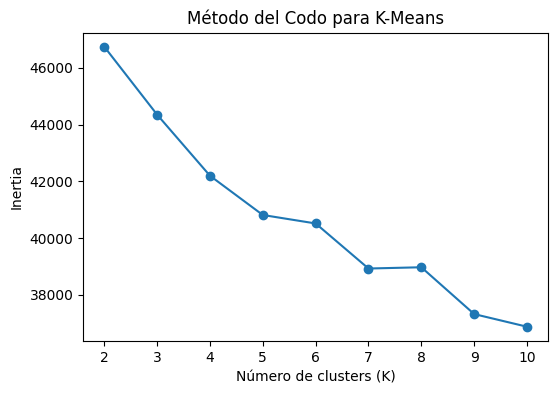

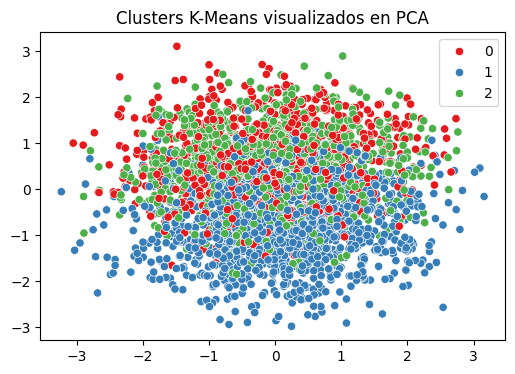

In [37]:
#K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Determinar el número óptimo de clusters usando el método del codo
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del codo
plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo para K-Means")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Selección del número de clusters (por ejemplo, K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadir cluster al dataset original
data['cluster_kmeans'] = clusters

# Visualización de clusters (primeras 2 dimensiones de PCA para graficar)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set1')
plt.title("Clusters K-Means visualizados en PCA")
plt.show()


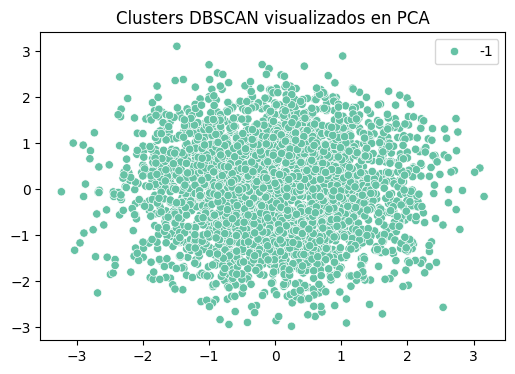

In [38]:
#DBSCAN
from sklearn.cluster import DBSCAN

# Configurar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
clusters_db = dbscan.fit_predict(X_scaled)

# Añadir cluster al dataset
data['cluster_dbscan'] = clusters_db

# Visualización con PCA
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_db, palette='Set2')
plt.title("Clusters DBSCAN visualizados en PCA")
plt.show()


In [39]:
#10. Resolución del Problema de las N-Caballos
from itertools import combinations

def es_valido(tablero, posiciones):
    """Verifica que ningún caballo ataque a otro."""
    movimientos = [(2,1),(1,2),(-1,2),(-2,1),(-2,-1),(-1,-2),(1,-2),(2,-1)]
    for i, (x1, y1) in enumerate(posiciones):
        for j, (x2, y2) in enumerate(posiciones):
            if i != j and (x2-x1, y2-y1) in movimientos:
                return False
    return True

def n_caballos_combinatorio(n, k):
    posiciones = [(i,j) for i in range(n) for j in range(n)]
    soluciones = []
    for combo in combinations(posiciones, k):
        if es_valido(n, combo):
            soluciones.append(combo)
    return soluciones

# Ejemplo para 4 caballos en tablero 4x4
soluciones = n_caballos_combinatorio(4, 4)
print("Número de soluciones:", len(soluciones))


Número de soluciones: 412


In [40]:
#10.2 Simulated Annealing
import random
import math

def funcion_objetivo(tablero):
    """Cuenta pares de caballos que se atacan entre sí."""
    ataques = 0
    n = len(tablero)
    movimientos = [(2,1),(1,2),(-1,2),(-2,1),(-2,-1),(-1,-2),(1,-2),(2,-1)]
    for i, (x1, y1) in enumerate(tablero):
        for j, (x2, y2) in enumerate(tablero):
            if i != j and (x2-x1, y2-y1) in movimientos:
                ataques += 1
    return ataques // 2  # cada ataque contado dos veces

def vecino(tablero, n):
    """Genera vecino moviendo un caballo a posición aleatoria."""
    nuevo = tablero.copy()
    idx = random.randint(0, len(tablero)-1)
    nuevo[idx] = (random.randint(0,n-1), random.randint(0,n-1))
    return nuevo

def simulated_annealing(n, k, temp=1000, alpha=0.95, iteraciones=1000):
    # Configuración inicial aleatoria
    tablero = [(random.randint(0,n-1), random.randint(0,n-1)) for _ in range(k)]
    mejor_tablero = tablero
    mejor_valor = funcion_objetivo(tablero)

    for _ in range(iteraciones):
        t = temp
        while t > 1:
            nuevo_tablero = vecino(tablero, n)
            delta = funcion_objetivo(nuevo_tablero) - funcion_objetivo(tablero)
            if delta < 0 or random.random() < math.exp(-delta / t):
                tablero = nuevo_tablero
            if funcion_objetivo(tablero) < mejor_valor:
                mejor_tablero = tablero
                mejor_valor = funcion_objetivo(tablero)
            t *= alpha
    return mejor_tablero, mejor_valor

# Ejemplo para 5 caballos en tablero 5x5
solucion, ataques = simulated_annealing(5,5)
print("Mejor configuración:", solucion)
print("Número de ataques:", ataques)


Mejor configuración: [(1, 4), (4, 2), (0, 4), (4, 1), (3, 2)]
Número de ataques: 0
